### Build Model To Classify Resume Category

In [1]:
#importing common libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading file
df = pd.read_csv(r"C:\Users\Siddhant Sonawane\Downloads\ExcelR\ExcelR Project\Resume Classification\Resume.csv")
df

,Resumes,Category
0,haripriya battina experience ui developer reac...,React JS Developer Resume
1,naveen sadhu title software developer location...,React JS Developer Resume
2,md khizaruddin rauf experience currently worki...,React JS Developer Resume
3,susovan bag seeking challenging position field...,React JS Developer Resume
4,name ravali p curriculum vitae specialization ...,React JS Developer Resume
...,...,...
74,venkateswarlu b workday consultant years exper...,Workday Resume
75,madeeswar profile summary around years experie...,Workday Resume
76,vinay kumar v workday functional consultant ex...,Workday Resume
77,workday integration consultant name sri krishn...,Workday Resume


In [3]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Resumes   79 non-null     object
 1   Category  79 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


#### Conclusion: From the above result we can conclude that no null value present in the data.

In [4]:
#Description of the data
df.describe()

,Resumes,Category
count,79,79
unique,77,4
top,ui developer react js developer name krishna p...,React JS Developer Resume
freq,2,24


### EDA

<AxesSubplot:xlabel='count', ylabel='Category'>

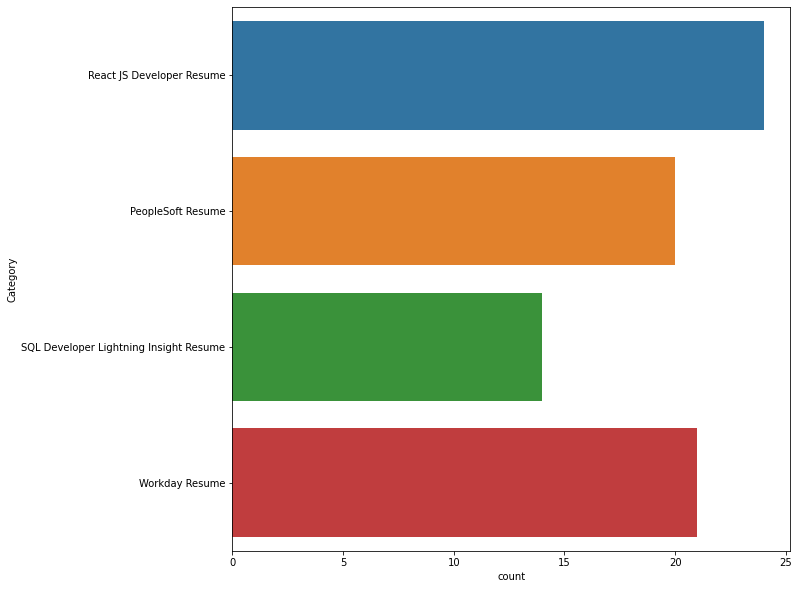

In [5]:
#Visualizing categories 
plt.figure(figsize=(10,10))
plt.xticks()
sns.countplot(y="Category", data=df)

### Priting most common words in resumes column with their frequency 

In [6]:
import nltk
import string
from nltk.corpus import stopwords
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = df['Resumes'].values
cleanedSentences = ""
for records in Sentences:
    cleanedSentences += records
    requiredWords = nltk.word_tokenize(records)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(100)
print(mostcommon)

[('experience', 598), ('peoplesoft', 453), ('workday', 431), ('application', 418), ('using', 395), ('server', 360), ('data', 332), ('project', 326), ('reports', 326), ('sql', 280), ('business', 273), ('web', 250), ('database', 243), ('process', 236), ('worked', 220), ('knowledge', 216), ('client', 197), ('system', 192), ('involved', 191), ('tools', 190), ('integrations', 189), ('integration', 183), ('hcm', 182), ('like', 180), ('support', 178), ('skills', 171), ('good', 169), ('development', 168), ('team', 166), ('creating', 164), ('working', 162), ('technical', 160), ('people', 160), ('services', 157), ('report', 155), ('design', 154), ('servers', 152), ('testing', 150), ('created', 150), ('react', 148), ('various', 146), ('oracle', 143), ('role', 142), ('developer', 139), ('environment', 139), ('responsibilities', 137), ('management', 136), ('security', 134), ('eib', 134), ('production', 133), ('issues', 132), ('studio', 128), ('core', 128), ('work', 124), ('custom', 124), ('js', 123

In [7]:
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer 
wn = WordNetLemmatizer() 
lem_words=[]
for word in wordfreqdist:
    word=wn.lemmatize(word)
    lem_words.append(word)

[nltk_data] Downloading package wordnet to C:\Users\Siddhant
[nltk_data]     Sonawane\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Siddhant
[nltk_data]     Sonawane\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


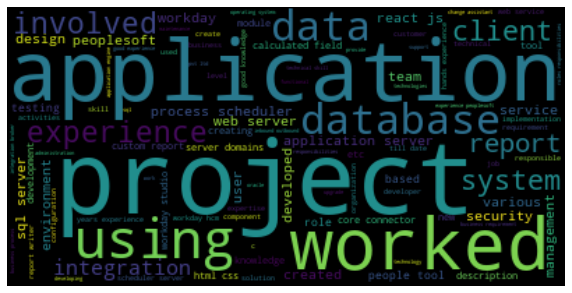

In [8]:
from wordcloud import WordCloud
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

### Printing most common words category wise

In [9]:
categories = np.sort(df['Category'].unique())
categories

array(['PeopleSoft Resume', 'React JS Developer Resume',
       'SQL Developer Lightning Insight Resume', 'Workday Resume'],
      dtype=object)

In [10]:
df_categories = [df[df['Category'] == category].loc[:, ['Resumes', 'Category']] for category in categories]
df_categories

[                                              Resumes           Category
 24  peoplesoft database administrator gangareddy p...  PeopleSoft Resume
 25  profile summary years experience implementing ...  PeopleSoft Resume
 26  c n c address manyata tech park nagavara banga...  PeopleSoft Resume
 27  peoplesoft admin varkala vikas career objectiv...  PeopleSoft Resume
 28  hari narayana professional summary years exper...  PeopleSoft Resume
 29  peoplesoft admin peoplesoft dba ganesh alladi ...  PeopleSoft Resume
 30  anubhav kumar singh core competencies scriptin...  PeopleSoft Resume
 31  sirazuddin bangalore india sirazuddin bangalor...  PeopleSoft Resume
 32  rahul ahuja summary years experience peoplesof...  PeopleSoft Resume
 33  priyanka ramadoss mountpleasant coonoor nilgir...  PeopleSoft Resume
 34  classification internal classification interna...  PeopleSoft Resume
 35  r ahmed peoplesoft technical consultant profes...  PeopleSoft Resume
 36  peoplesoft administration vivekan

In [11]:
def wordcloud(df):
    txt = ' '.join(txt for txt in df['Resumes'])
    wordcloud = WordCloud(height=2000,width=4000,colormap=WORDCLOUD_COLOR_MAP).generate(txt) 
    return wordcloud

In [12]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [13]:
 plt.colormaps()

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight

In [14]:
PLOT_PALETTE = 'tableau-colorblind10'
WORDCLOUD_COLOR_MAP = 'plasma_r'
plt.style.use(PLOT_PALETTE)
%matplotlib inline

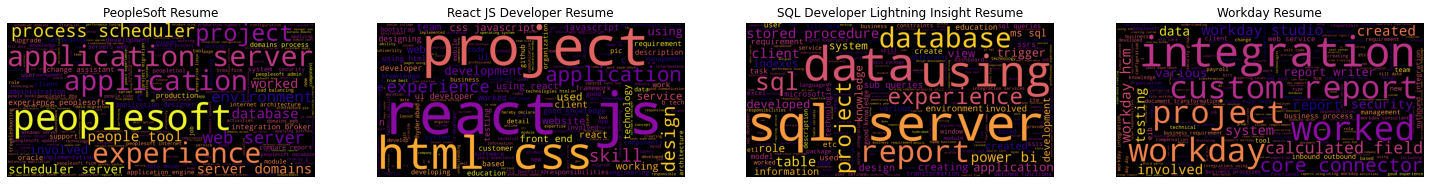

In [15]:
plt.figure(figsize=(32, 32))

for i, category in enumerate(categories):
    wc = wordcloud(df_categories[i])

    plt.subplot(5, 5, i + 1).set_title(category)
    plt.imshow(wc)
    plt.axis('off')
    plt.plot()

plt.show()
plt.close()

### Printing Top-10 words used in per category

In [16]:
def wordfreq(df):
    count = df['Resumes'].str.split(expand=True).stack().value_counts().reset_index()
    count.columns = ['Word', 'Frequency']

    return count.head(10)

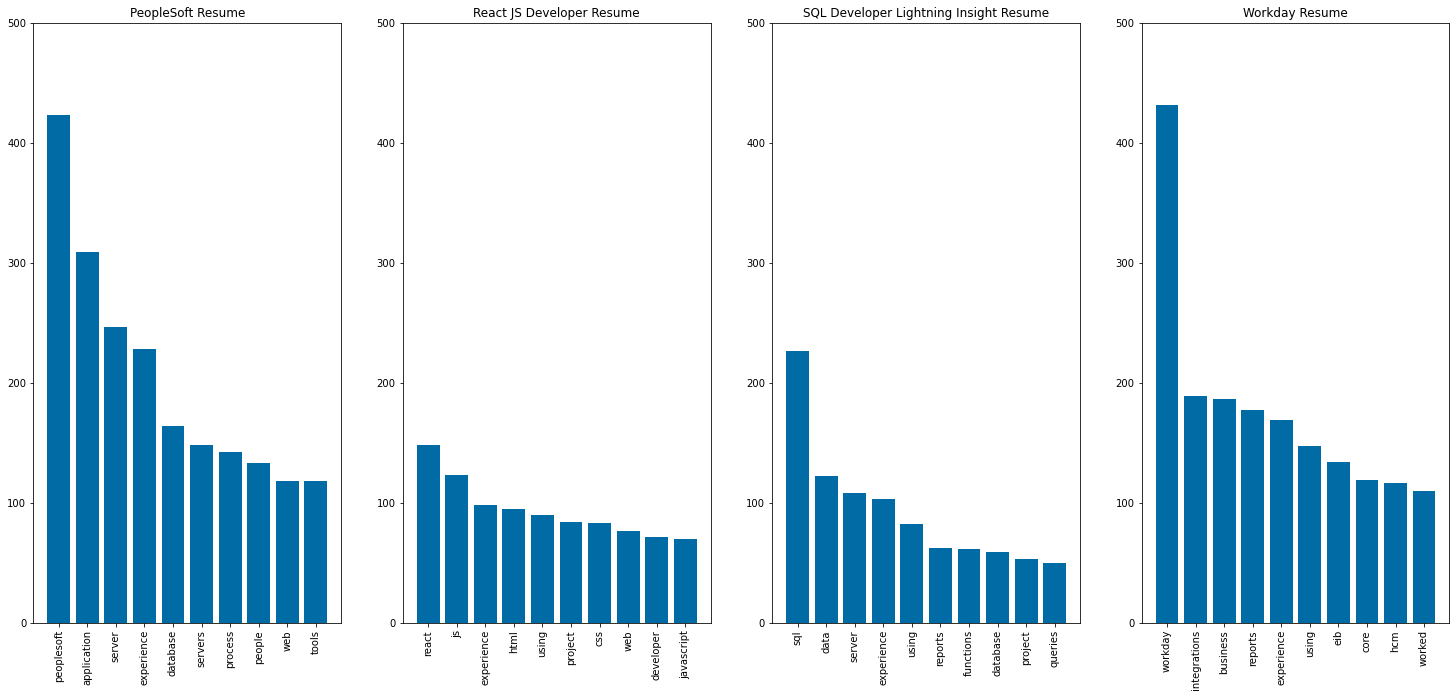

In [17]:
fig = plt.figure(figsize=(32, 64))

for i, category in enumerate(categories):
    wf = wordfreq(df_categories[i])

    fig.add_subplot(5, 5, i + 1).set_title(category)
    plt.bar(wf['Word'], wf['Frequency'])
    plt.ylim(0, 500)
    plt.xticks(rotation=90)

plt.show()
plt.close()

### Splitting Data into train and test

In [18]:
from sklearn.model_selection import train_test_split

#input data
X=df['Resumes']

#target data
Y=df['Category']

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.33,random_state=10,stratify=Y)

In [19]:
x_train,y_train

(37    personal details name pritam biswas date birth...
 40    priyabrata hota career objective pursuing peop...
 47    career objective rewarding opportunity growth ...
 27    peoplesoft admin varkala vikas career objectiv...
 26    c n c address manyata tech park nagavara banga...
 20    ui developer react js developer name krishna p...
 42    peoplesoft administrator srinivas k experience...
 38    murali professional summary years experience p...
 16    thirupathamma balla summary year experience re...
 10    kamalakar reddy linked www linkedin com kamala...
 34    classification internal classification interna...
 29    peoplesoft admin peoplesoft dba ganesh alladi ...
 43    arun venu experience summary experience years ...
 77    workday integration consultant name sri krishn...
 54    sql server developer p syam kumar professional...
 6     mareedu lokesh babu professional overview arou...
 74    venkateswarlu b workday consultant years exper...
 3     susovan bag seeking chal

In [20]:
x_test,y_test

(39    vinod akkala peoplesoft dba admin professional...
 11    venkatalakshmi pedireddy software developer ex...
 63    shireesh balasani hcm consultant profile summa...
 46    sql msbi developer sql msbi developer b vinod ...
 13    maryala vinay reddy professional summary years...
 4     name ravali p curriculum vitae specialization ...
 8     pranish sonone career summary experience years...
 70    name gopi krishna reddy professional summery w...
 14    ranga gaganam professional summary professiona...
 50    hyderabad nazeer basha sql power bi developer ...
 23    kambala sai surendra summary project basic kno...
 66    pic pic years experience workday hcm technical...
 28    hari narayana professional summary years exper...
 33    priyanka ramadoss mountpleasant coonoor nilgir...
 58    workday hcm fcm name kumar role workday consul...
 35    r ahmed peoplesoft technical consultant profes...
 52    buddha vamsi career objective years experience...
 73    harikrishna akula summar

In [21]:
#Label Encoding 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
#fit_transform on train data only to avoid data leakage 
y_train_ = le.fit_transform(y_train)
#transform on test data
y_test_ = le.transform(y_test)

In [22]:
y_train_,y_test_

(array([0, 0, 2, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 3, 2, 1, 3, 1, 3, 3, 0, 2,
        2, 1, 2, 1, 3, 3, 1, 1, 3, 3, 1, 1, 2, 0, 1, 1, 0, 2, 0, 1, 3, 2,
        3, 3, 3, 3, 1, 3, 2, 1]),
 array([0, 1, 3, 2, 1, 1, 1, 3, 1, 2, 1, 3, 0, 0, 3, 0, 2, 3, 2, 1, 1, 2,
        3, 0, 0, 0, 3]))

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

In [24]:
requiredText = x_train.values
requiredText1 = x_test.values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
word_vectorizer.fit(requiredText)
x_train_ = word_vectorizer.transform(requiredText)
x_test_ = word_vectorizer.transform(requiredText1)

print ("Feature completed .....")

Feature completed .....


In [25]:
x_train_,x_test_

(<52x3653 sparse matrix of type '<class 'numpy.float64'>'
 	with 13218 stored elements in Compressed Sparse Row format>,
 <27x3653 sparse matrix of type '<class 'numpy.float64'>'
 	with 5749 stored elements in Compressed Sparse Row format>)

### Model Building 

In [26]:
#importing necessay library
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score,accuracy_score,recall_score,precision_score,confusion_matrix,recall_score,classification_report

In [27]:
#random forest model
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train_, y_train_)
prediction_1 = rf_clf.predict(x_test_)
print('Accuracy of Decision Tree Classifier on training set: {:.4f}'.format(rf_clf.score(x_train_, y_train_)))
print('Accuracy of Decision Tree Classifier on test set    : {:.4f}'.format(rf_clf.score(x_test_, y_test_)))

Accuracy of Decision Tree Classifier on training set: 1.0000
Accuracy of Decision Tree Classifier on test set    : 1.0000


In [28]:
print("\n Classification report for Decision Tree Classifier %s:\n%s\n" % (rf_clf,classification_report(y_test_, prediction_1)))


 Classification report for Decision Tree Classifier RandomForestClassifier():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27




In [29]:
accuracy_1 = round(accuracy_score(y_test_,prediction_1),4)
precision_1 = round(precision_score(y_test_,prediction_1,average = 'macro'),4)
recall_1 = round(recall_score(y_test_,prediction_1, average = 'macro'),4)
f1_1 = round(f1_score(y_test_,prediction_1, average = 'macro'),4)

In [30]:
print('Accuracy Score   : ', accuracy_1)
print('Precision Score  : ', precision_1)
print('Recall Score     : ', recall_1)
print('f1-Score         : ', f1_1)
print('Confusion Matrix :\n',confusion_matrix(y_test_,prediction_1))

Accuracy Score   :  1.0
Precision Score  :  1.0
Recall Score     :  1.0
f1-Score         :  1.0
Confusion Matrix :
 [[7 0 0 0]
 [0 8 0 0]
 [0 0 5 0]
 [0 0 0 7]]


In [31]:
#SVM model
sv_clf = SVC()
sv_clf.fit(x_train_, y_train_)
prediction_2 = sv_clf.predict(x_test_)
print('Accuracy of Support Vector Classifier on training set: {:.4f}'.format(sv_clf.score(x_train_, y_train_)))
print('Accuracy of Support Vector Classifier on test set    : {:.4f}'.format(sv_clf.score(x_test_, y_test_)))

Accuracy of Support Vector Classifier on training set: 1.0000
Accuracy of Support Vector Classifier on test set    : 0.9630


In [32]:
print("\n Classification report for Support Vector Classifier %s:\n%s\n" % (sv_clf,classification_report(y_test_, prediction_2)))



 Classification report for Support Vector Classifier SVC():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.89      1.00      0.94         8
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         7

    accuracy                           0.96        27
   macro avg       0.97      0.95      0.96        27
weighted avg       0.97      0.96      0.96        27




In [33]:
accuracy_2 = round(accuracy_score(y_test_,prediction_2),4)
precision_2 = round(precision_score(y_test_,prediction_2,average = 'macro'),4)
recall_2 = round(recall_score(y_test_,prediction_2, average = 'macro'),4)
f1_2 = round(f1_score(y_test_,prediction_2, average = 'macro'),4)

In [34]:
print('Accuracy Score   : ', accuracy_2)
print('Precision Score  : ', precision_2)
print('Recall Score     : ', recall_2)
print('f1-Score         : ', f1_2)
print('Confusion Matrix :\n',confusion_matrix(y_test_,prediction_2))

Accuracy Score   :  0.963
Precision Score  :  0.9722
Recall Score     :  0.95
f1-Score         :  0.9575
Confusion Matrix :
 [[7 0 0 0]
 [0 8 0 0]
 [0 1 4 0]
 [0 0 0 7]]


In [35]:
#Multinomial-Naive_Bayes
nb_clf = MultinomialNB()
nb_clf.fit(x_train_, y_train_)
prediction_3 = nb_clf.predict(x_test_)
print('Accuracy of Multinomial NB Classifier on training set: {:.4f}'.format(nb_clf.score(x_train_, y_train_)))
print('Accuracy of Multinomial NB Classifier on test set    : {:.4f}'.format(nb_clf.score(x_test_, y_test_)))

Accuracy of Multinomial NB Classifier on training set: 1.0000
Accuracy of Multinomial NB Classifier on test set    : 0.8519


In [36]:
print("\n Classification report for Multinomial NB Classifier %s:\n%s\n" % (nb_clf,classification_report(y_test_, prediction_3)))



 Classification report for Multinomial NB Classifier MultinomialNB():
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.89      1.00      0.94         8
           2       1.00      0.40      0.57         5
           3       0.70      1.00      0.82         7

    accuracy                           0.85        27
   macro avg       0.90      0.81      0.81        27
weighted avg       0.89      0.85      0.84        27




In [37]:
accuracy_3 = round(accuracy_score(y_test_,prediction_3),4)
precision_3 = round(precision_score(y_test_,prediction_3,average = 'macro'),4)
recall_3 = round(recall_score(y_test_,prediction_3, average = 'macro'),4)
f1_3 = round(f1_score(y_test_,prediction_3, average = 'macro'),4)

In [38]:
print('Accuracy Score  : ', accuracy_3)
print('Precision Score : ', precision_3)
print('Recall Score    : ', recall_3)
print('f1-Score        : ', f1_3)
print('Confusion Matrix:\n',confusion_matrix(y_test_,prediction_3))

Accuracy Score  :  0.8519
Precision Score :  0.8972
Recall Score    :  0.8143
f1-Score        :  0.8148
Confusion Matrix:
 [[6 0 0 1]
 [0 8 0 0]
 [0 1 2 2]
 [0 0 0 7]]


In [39]:
#Logistic regression
logistic_clf = LogisticRegression()
logistic_clf.fit(x_train_, y_train_)
prediction_4 = logistic_clf.predict(x_test_)
print('Accuracy of Logistic Regression Classifier on training set: {:.4f}'.format(logistic_clf.score(x_train_, y_train_)))
print('Accuracy of Logistic Regression Classifier on test set    : {:.4f}'.format(logistic_clf.score(x_test_, y_test_)))

Accuracy of Logistic Regression Classifier on training set: 1.0000
Accuracy of Logistic Regression Classifier on test set    : 0.9630


In [40]:
print("\n Classification report for Logistic Regression Classifier %s:\n%s\n" % (logistic_clf,classification_report(y_test_, prediction_4)))



 Classification report for Logistic Regression Classifier LogisticRegression():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.89      1.00      0.94         8
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         7

    accuracy                           0.96        27
   macro avg       0.97      0.95      0.96        27
weighted avg       0.97      0.96      0.96        27




In [41]:
accuracy_4 = round(accuracy_score(y_test_,prediction_4),4)
precision_4 = round(precision_score(y_test_,prediction_4,average = 'macro'),4)
recall_4 = round(recall_score(y_test_,prediction_4, average = 'macro'),4)
f1_4 = round(f1_score(y_test_,prediction_4, average = 'macro'),4)

In [42]:
print('Accuracy Score  : ', accuracy_4)
print('Precision Score : ', precision_4)
print('Recall Score    : ', recall_4)
print('f1-Score        : ', f1_4)
print('Confusion Matrix:\n',confusion_matrix(y_test_,prediction_4))

Accuracy Score  :  0.963
Precision Score :  0.9722
Recall Score    :  0.95
f1-Score        :  0.9575
Confusion Matrix:
 [[7 0 0 0]
 [0 8 0 0]
 [0 1 4 0]
 [0 0 0 7]]


In [43]:
#adaboost classifier
ab_clf = AdaBoostClassifier()
ab_clf.fit(x_train_, y_train_)
prediction_5 = ab_clf.predict(x_test_)
print('Accuracy of AdaBoost Classifier on training set: {:.4f}'.format(ab_clf.score(x_train_, y_train_)))
print('Accuracy of AdaBoost Classifier on test set    : {:.4f}'.format(ab_clf.score(x_test_, y_test_)))

Accuracy of AdaBoost Classifier on training set: 0.7500
Accuracy of AdaBoost Classifier on test set    : 0.7407


In [44]:
print("\n Classification report for AdaBoost Classifier %s:\n%s\n" % (ab_clf,classification_report(y_test_, prediction_5)))



 Classification report for AdaBoost Classifier AdaBoostClassifier():
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.53      1.00      0.70         8
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7

    accuracy                           0.74        27
   macro avg       0.63      0.75      0.67        27
weighted avg       0.60      0.74      0.65        27




C:\Users\Siddhant Sonawane\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Siddhant Sonawane\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Siddhant Sonawane\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
accuracy_5 = round(accuracy_score(y_test_,prediction_5),4)
precision_5 = round(precision_score(y_test_,prediction_5,average = 'macro'),4)
recall_5 = round(recall_score(y_test_,prediction_5, average = 'macro'),4)
f1_5 = round(f1_score(y_test_,prediction_5, average = 'macro'),4)

C:\Users\Siddhant Sonawane\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
print('Accuracy Score  : ', accuracy_5)
print('Precision Score : ', precision_5)
print('Recall Score    : ', recall_5)
print('f1-Score        : ', f1_5)
print('Confusion Matrix:\n',confusion_matrix(y_test_,prediction_5))

Accuracy Score  :  0.7407
Precision Score :  0.6333
Recall Score    :  0.75
f1-Score        :  0.6739
Confusion Matrix:
 [[0 7 0 0]
 [0 8 0 0]
 [0 0 5 0]
 [0 0 0 7]]


In [47]:
#gradient boosting classifier 
gb_clf = GradientBoostingClassifier()
gb_clf.fit(x_train_, y_train_)
prediction_6 = gb_clf.predict(x_test_)
print('Accuracy of GradientBoosting Classifier on training set: {:.4f}'.format(gb_clf.score(x_train_, y_train_)))
print('Accuracy of GradientBoosting Classifier on test set    : {:.4f}'.format(gb_clf.score(x_test_, y_test_)))

Accuracy of GradientBoosting Classifier on training set: 1.0000
Accuracy of GradientBoosting Classifier on test set    : 1.0000


In [48]:
print("\n Classification report for GradientBoosting Classifier %s:\n%s\n" % (gb_clf,classification_report(y_test_, prediction_6)))


 Classification report for GradientBoosting Classifier GradientBoostingClassifier():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27




In [49]:
accuracy_6 = round(accuracy_score(y_test_,prediction_6),4)
precision_6 = round(precision_score(y_test_,prediction_6,average = 'macro'),4)
recall_6 = round(recall_score(y_test_,prediction_6, average = 'macro'),4)
f1_6 = round(f1_score(y_test_,prediction_6, average = 'macro'),4)

In [50]:
print('Accuracy Score  : ', accuracy_6)
print('Precision Score : ', precision_6)
print('Recall Score    : ', recall_6)
print('f1-Score        : ', f1_6)
print('Confusion Matrix:\n',confusion_matrix(y_test_,prediction_6))

Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0
Confusion Matrix:
 [[7 0 0 0]
 [0 8 0 0]
 [0 0 5 0]
 [0 0 0 7]]


In [51]:
#XgbmClassifier
xgb_clf = XGBClassifier()
xgb_clf.fit(x_train_, y_train_)
prediction_7 = xgb_clf.predict(x_test_)
print('Accuracy of XtremeGradientBoosting Classifier on training set: {:.4f}'.format(xgb_clf.score(x_train_, y_train_)))
print('Accuracy of XtremeGradientBoosting Classifier on test set    : {:.4f}'.format(xgb_clf.score(x_test_, y_test_)))

Accuracy of XtremeGradientBoosting Classifier on training set: 1.0000
Accuracy of XtremeGradientBoosting Classifier on test set    : 0.9630


In [52]:
print("\n Classification report for XtremeGradientBoosting Classifier %s:\n%s\n" % (xgb_clf,classification_report(y_test_, prediction_7)))


 Classification report for XtremeGradientBoosting Classifier XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.88      0.93         8
           2       0.83      1.00      0.91         5
       

In [53]:
accuracy_7 = round(accuracy_score(y_test_,prediction_7),4)
precision_7 = round(precision_score(y_test_,prediction_7,average = 'macro'),4)
recall_7 = round(recall_score(y_test_,prediction_7, average = 'macro'),4)
f1_7 = round(f1_score(y_test_,prediction_7, average = 'macro'),4)

In [54]:
print('Accuracy Score  : ', accuracy_7)
print('Precision Score : ', precision_7)
print('Recall Score    : ', recall_7)
print('f1-Score        : ', f1_7)
print('Confusion Matrix:\n',confusion_matrix(y_test_,prediction_7))

Accuracy Score  :  0.963
Precision Score :  0.9583
Recall Score    :  0.9688
f1-Score        :  0.9606
Confusion Matrix:
 [[7 0 0 0]
 [0 7 1 0]
 [0 0 5 0]
 [0 0 0 7]]


In [55]:
#LGBMClassifier
lgb_clf = LGBMClassifier()
lgb_clf.fit(x_train_, y_train_)
prediction_8 = lgb_clf.predict(x_test_)
print('Accuracy of LightGradientBoosting Classifier on training set: {:.4f}'.format(lgb_clf.score(x_train_, y_train_)))
print('Accuracy of LightGradientBoosting Classifier on test set    : {:.4f}'.format(lgb_clf.score(x_test_, y_test_)))

Accuracy of LightGradientBoosting Classifier on training set: 1.0000
Accuracy of LightGradientBoosting Classifier on test set    : 0.9259


In [56]:
print("\n Classification report for LightGradientBoosting Classifier %s:\n%s\n" % (lgb_clf,classification_report(y_test_, prediction_8)))


 Classification report for LightGradientBoosting Classifier LGBMClassifier():
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.88      0.93         8
           2       0.83      1.00      0.91         5
           3       1.00      0.86      0.92         7

    accuracy                           0.93        27
   macro avg       0.93      0.93      0.92        27
weighted avg       0.94      0.93      0.93        27




In [57]:
accuracy_8 = round(accuracy_score(y_test_,prediction_8),4)
precision_8 = round(precision_score(y_test_,prediction_8,average = 'macro'),4)
recall_8 = round(recall_score(y_test_,prediction_8, average = 'macro'),4)
f1_8 = round(f1_score(y_test_,prediction_8, average = 'macro'),4)

In [58]:
print('Accuracy Score  : ', accuracy_8)
print('Precision Score : ', precision_8)
print('Recall Score    : ', recall_8)
print('f1-Score        : ', f1_8)
print('Confusion Matrix:\n',confusion_matrix(y_test_,prediction_8))

Accuracy Score  :  0.9259
Precision Score :  0.9271
Recall Score    :  0.933
f1-Score        :  0.9247
Confusion Matrix:
 [[7 0 0 0]
 [0 7 1 0]
 [0 0 5 0]
 [1 0 0 6]]


In [59]:
Performance_matrix = {'Classifier' : ['Random Forest Classifier', 'SVM Classifier', 'Multinomial NB Classifier', 'Logistic Regression', 'AdaBoost Classifier', 'Gradient Boosting Classifier', 'Xtreme Gradient Boosting Classifier', 'Light Gradient Boosting Classifier'], 'Accuracy Score' : [accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_5, accuracy_6, accuracy_7, accuracy_8], 'Precision Score' : [precision_1, precision_2, precision_3, precision_4, precision_5, precision_6, precision_7, precision_8], 'Recall Score' : [recall_1, recall_2, recall_3, recall_4, recall_5, recall_6, recall_7, recall_8], 'f1-Score' : [f1_1, f1_2, f1_3, f1_4, f1_5, f1_6, f1_7, f1_8]}
Performance_matrix = pd.DataFrame(Performance_matrix)
Performance_matrix

,Classifier,Accuracy Score,Precision Score,Recall Score,f1-Score
0,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000
1,SVM Classifier,0.9630,0.9722,0.9500,0.9575
2,Multinomial NB Classifier,0.8519,0.8972,0.8143,0.8148
3,Logistic Regression,0.9630,0.9722,0.9500,0.9575
4,AdaBoost Classifier,0.7407,0.6333,0.7500,0.6739
5,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000
6,Xtreme Gradient Boosting Classifier,0.9630,0.9583,0.9688,0.9606
7,Light Gradient Boosting Classifier,0.9259,0.9271,0.9330,0.9247


### Note : Selecting Random Forest Classifier as Final model.

In [63]:
Final_model = RandomForestClassifier()
Final_model.fit(x_train_,y_train_)
Prediction = Final_model.predict(x_test_)

In [67]:
Accuracy = round(accuracy_score(y_test_,Prediction),4)
Precision = round(precision_score(y_test_,Prediction,average='macro'),4)
Recall = round(recall_score(y_test_,Prediction,average='macro'),4)
F_1_score = round(f1_score(y_test_,Prediction,average='macro'),4)

In [73]:
print('Accuracy Score  : ', Accuracy)
print('Precision Score : ', Precision)
print('Recall Score    : ', Recall)
print('f1-Score        : ', F_1_score)
print('Confusion Matrix:\n',confusion_matrix(y_test_,Prediction))

Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0
Confusion Matrix:
 [[7 0 0 0]
 [0 8 0 0]
 [0 0 5 0]
 [0 0 0 7]]


### Pipeline

In [74]:
from sklearn.pipeline import Pipeline

In [76]:
estimator = []
estimator.append(('Final_model',RandomForestClassifier()))
model=Pipeline(estimator)
model.fit(x_train_,y_train_)

Pipeline(steps=[('Final_model', RandomForestClassifier())])

### Saving model using Pickle file

In [77]:
import pickle
pickle.dump(model,open('RF.pkl','wb'))

In [78]:
loaded_model=pickle.load(open('RF.pkl','rb'))

In [79]:
prediciton = loaded_model.predict(x_test_)

In [80]:
prediciton

array([0, 1, 3, 2, 1, 1, 1, 3, 1, 2, 1, 3, 0, 0, 3, 0, 2, 3, 2, 1, 1, 2,
       3, 0, 0, 0, 3])